In [1]:
# <center>Предсказание цены велосипеда.</center>
## <center>Часть 1. Разведочный анализ данных</center>

Рассмотрим датасет велосипедов, который можно скачать [тут](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset).

Описание датасета:
The columns in the given dataset are as follows:

- name
- selling price
- year
- seller type
- owner
- km driven
- ex showroom price


Необходимо решить задачу классификации и научиться предсказывать целовой признак **?** выживет ли пассажир по его нецелевым признакам.

Сперва подключим необходимые библиотеки.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [3]:
df = pd.read_csv('./bike_details.csv')

In [4]:
df.count()

name                 1061
selling_price        1061
year                 1061
seller_type          1061
owner                1061
km_driven            1061
ex_showroom_price     626
dtype: int64

In [5]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Проверяем общее количество пропущенных значений.

In [6]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Признак **ex_showroom_price** и **Embarked** имеет пропущенные значения. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [7]:
df['selling_price'].value_counts()

25000    77
35000    66
50000    63
40000    63
30000    62
         ..
39000     1
83299     1
14700     1
19000     1
31000     1
Name: selling_price, Length: 130, dtype: int64

Признак selling_price -- количественный, поэтому используем для его анализа ящик с усами.

<AxesSubplot: xlabel='selling_price'>

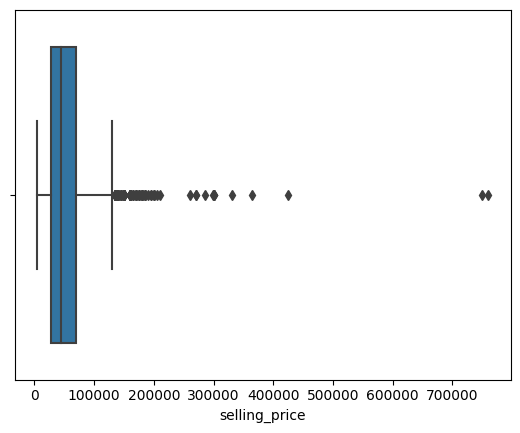

In [8]:
sns.boxplot(x=df['selling_price'])

Из графика видно, что у нас есть некоторые выбросы, которые мешают анализу. Уберем эти выбросы.

<AxesSubplot: xlabel='selling_price'>

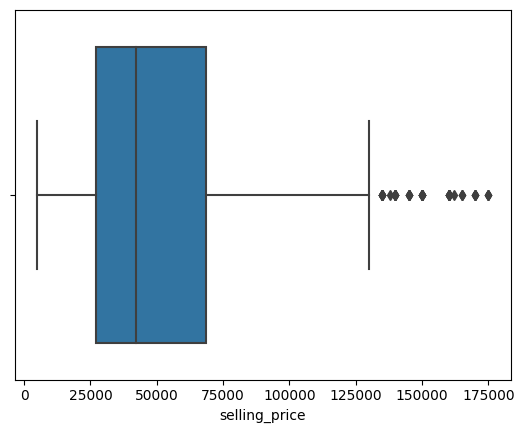

In [9]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
sns.boxplot(x=df_2['selling_price'])

Посмотрим, какое среднее значение цены было у велосипеда.

In [10]:
df['selling_price'].mean()

59638.1517

Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

Признак Name содержит слишком много уникальных значений, хотя в названии каждого велосипеда как правило присутствует бренд. На основе признака Name cформируем новый признак Brand, а признак Name выкинем. 

In [11]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [12]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [13]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

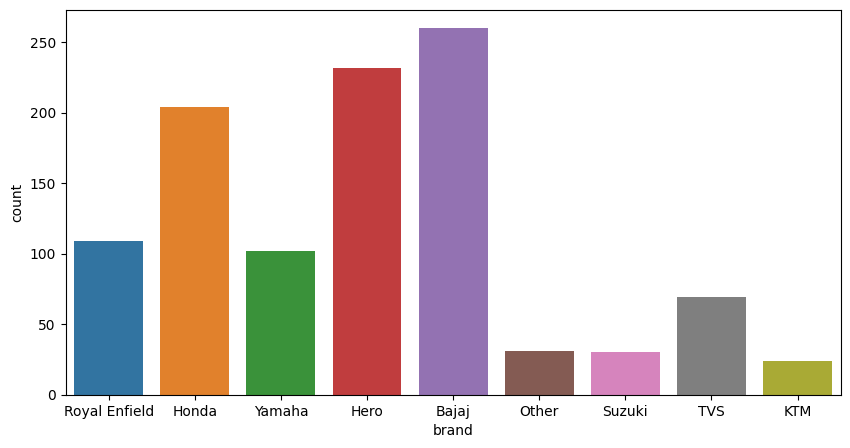

In [14]:
df['brand'] = df['name'].apply(lambda x: brand(x))
sns.countplot(x=df['brand'])
fig = plt.gcf()
fig.set_size_inches(10, 5)

Как видно, создание нового признака brand было уместным --- к категории Other относится совсем немного велосипедов. Можно будет удалить признак name.

### Количественный признак Year

(array([  2.,   1.,   3.,  10.,   6.,  68., 116., 204., 298., 353.]),
 array([1988. , 1991.2, 1994.4, 1997.6, 2000.8, 2004. , 2007.2, 2010.4,
        2013.6, 2016.8, 2020. ]),
 <BarContainer object of 10 artists>)

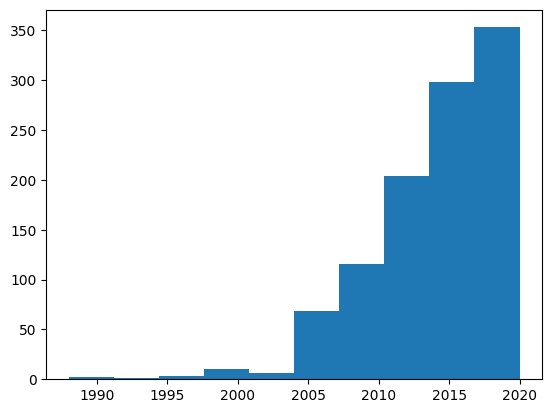

In [15]:
plt.hist(x=df['year'])

<AxesSubplot: xlabel='year'>

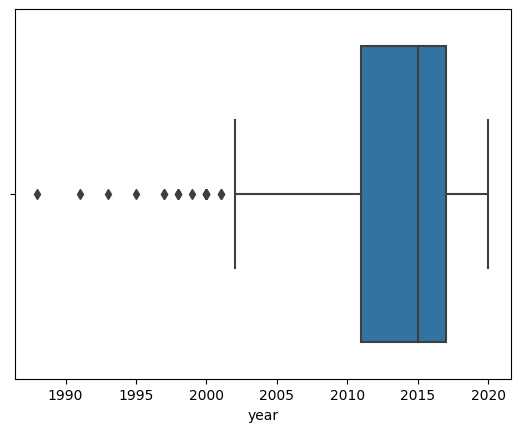

In [16]:
sns.boxplot(x=df['year'])

## Количественный признак km_driven

(array([1.022e+03, 2.900e+01, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.50000e+02, 8.83150e+04, 1.76280e+05, 2.64245e+05, 3.52210e+05,
        4.40175e+05, 5.28140e+05, 6.16105e+05, 7.04070e+05, 7.92035e+05,
        8.80000e+05]),
 <BarContainer object of 10 artists>)

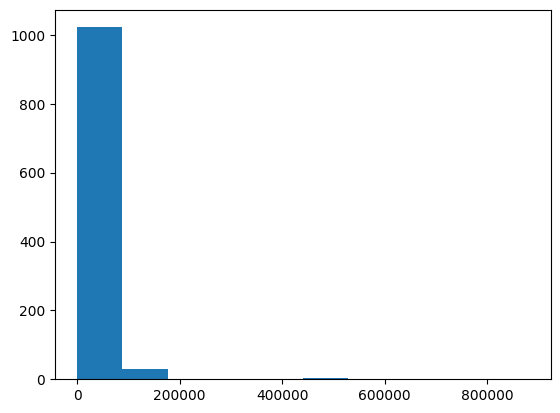

In [17]:
plt.hist(x=df['km_driven'])

Большинство велосипедов имеет пробег до 200000км.

### Категориальный признак seller_type

<AxesSubplot: xlabel='seller_type', ylabel='count'>

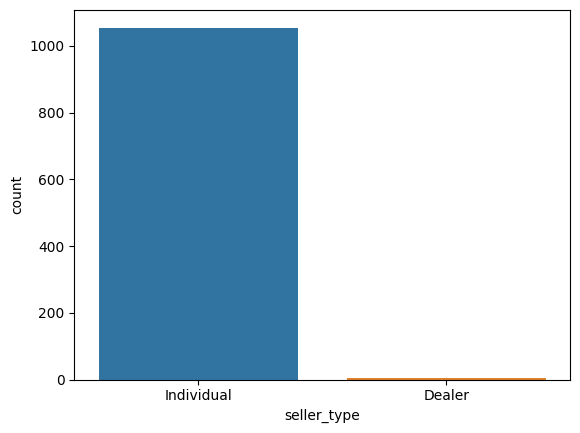

In [18]:
sns.countplot(x=df['seller_type'])

Подавляющее большинство велосипедов продается частными лицами, поэтому перед обучением удалим этот признак.

### Категориальный признак owner

<AxesSubplot: xlabel='owner', ylabel='count'>

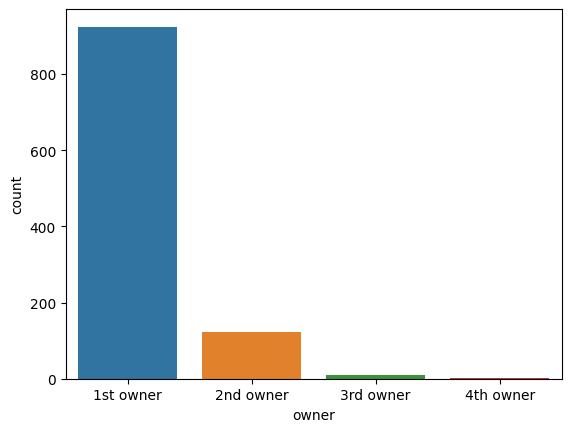

In [19]:
sns.countplot(x=df['owner'])

Большинство велосипедов имели только одного владельца.

### Двумерный анализ признаков

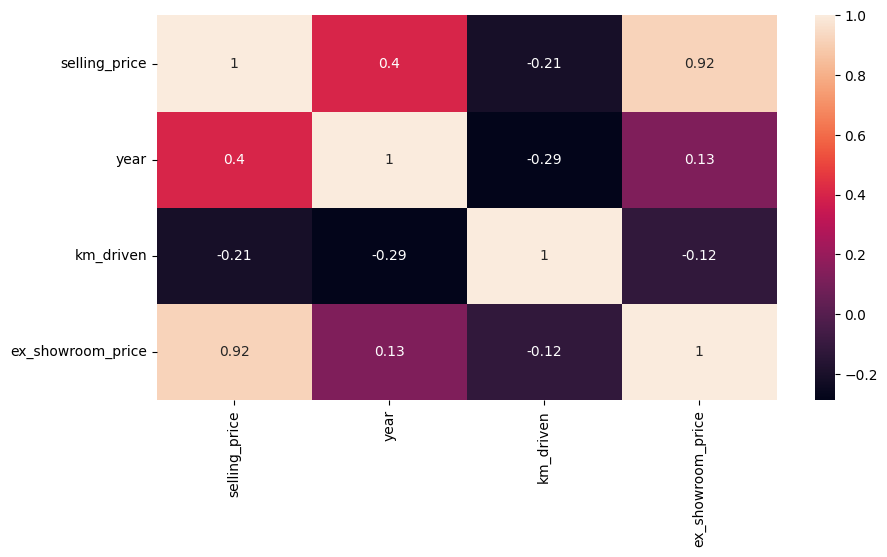

In [20]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Из карты признаков видна высокая корелляция признаков selling_price и ex_showroom_price. Так как признак ex_showroom_price имеет пропущенные значения, кажется целесообразным убрать его в процессе чистки. Еще из карты видна кажущаяся естественной корелляция километров пробега (km_driven) и возраста велосипеда (year) --- чем больше лет велосипеду, тем больше на нем проездили.

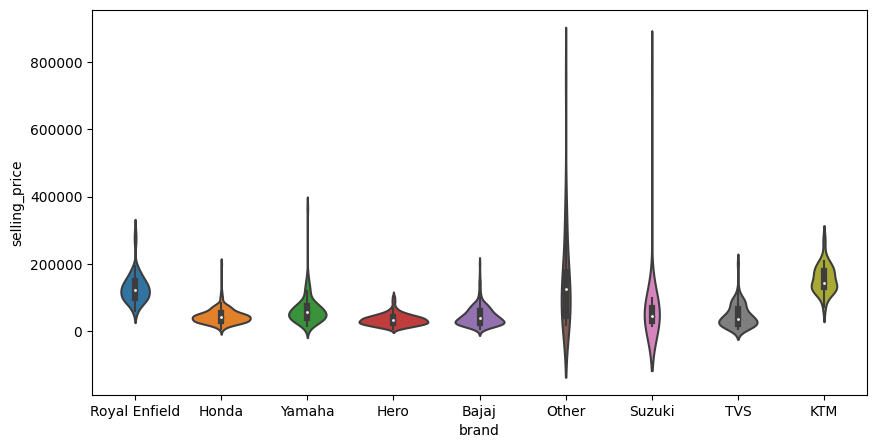

In [21]:
sns.violinplot(data=df,x="brand", y="selling_price", split=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)

Из графика с виолончелями можно сделать вывод, что наименьший разброс по цене имеют велосипеды марки Hero. При этом, например, велосипеды марки KTM в целом дороже велосипедов марки Hero.

Так как вместо признака name мы ввели признак brand, а ex_showroom_price имеет высокую корелляцию с selling_price и большое количество пропущенных значений, их можно удалить. Так как мы собираемся предсказывать значения признака selling_price, его мы тоже удалим. Разобьем датасет на тестовую и обучающую выборки, используя существующие методы. Также трансформируем категориальные признаки owner, seller_type, brand с помощью метода get_dummies в наборы соответствующих колонок с булевыми значениями.

In [22]:
df = pd.get_dummies(df, columns = ['owner','brand','seller_type'], drop_first = True)
df = df.drop(columns=["name","ex_showroom_price"])
#df = df.drop("name", axis=1, inplace=True)
df.shape

(1061, 15)

In [23]:
from sklearn.model_selection import train_test_split

data_z = (df - df.mean()) / df.std()
#data_z.describe()
data_z['x_0'] = 1
X = data_z.drop(['selling_price'], axis=1)
y = data_z['selling_price']
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, X_test.shape, len(y_train), len(y_test))
print(np.matrix(X_test.values))

(742, 15) (319, 15) (319, 15) 742 319
[[-0.20159682  0.7872469  -0.36194816 ...  3.06481637  0.075378
   1.        ]
 [-0.66658427  0.10925654 -0.36194816 ... -0.3259763   0.075378
   1.        ]
 [-1.59655917  1.27152573  2.76022258 ... -0.3259763   0.075378
   1.        ]
 ...
 [-0.89907799  0.22548345 -0.36194816 ...  3.06481637  0.075378
   1.        ]
 [ 0.0308969   8.05142935 -0.36194816 ... -0.3259763   0.075378
   1.        ]
 [ 0.0308969   0.06162287  2.76022258 ... -0.3259763   0.075378
   1.        ]]


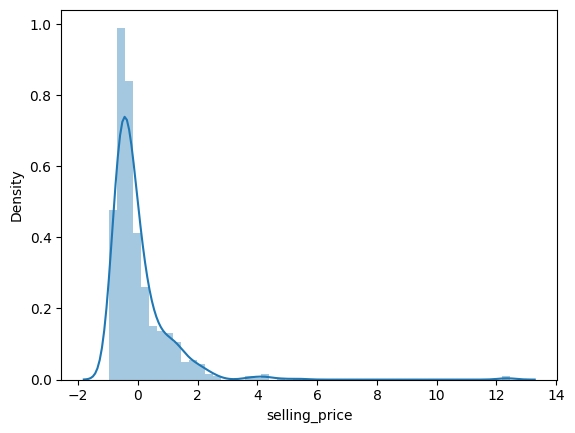

In [24]:
sns.distplot(y_train);

In [25]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

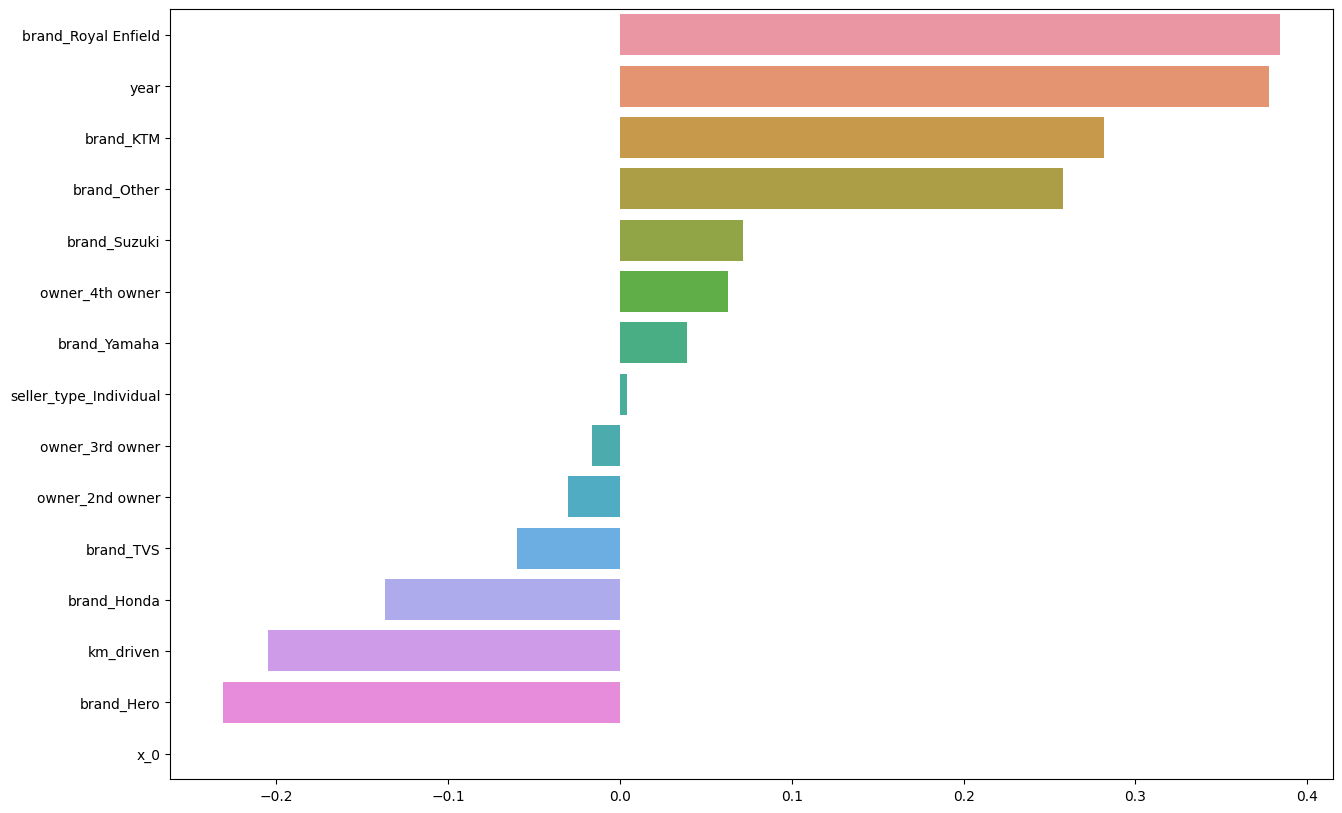

In [26]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [27]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("R2 =", r2_score(y_train, y_train_pred))
print("R2 =", r2_score(y_test, y_test_pred))

Test RMSE = 0.5691941299165456
Train RMSE = 0.7835205711190043
R2 = 0.44464113209961675
R2 = 0.568627005313636


In [28]:
model.coef_

array([ 0.2814482 , -0.10815321,  0.0033351 ,  0.01223873,  0.09495169,
       -0.05211838, -0.04662917,  0.27145475,  0.25484185,  0.41535498,
        0.08609414, -0.00047516,  0.07921166, -0.01767876,  0.        ])

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 0.5466
	0.4622
	0.5127
	0.4494
	1.6182
Mean CV MSE = 0.7178


In [30]:
stupid_pred = y_train.mean()
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with stupid predictor = 0.8671329608767381
Train RMSE with stupid predictor = 1.051389287515122


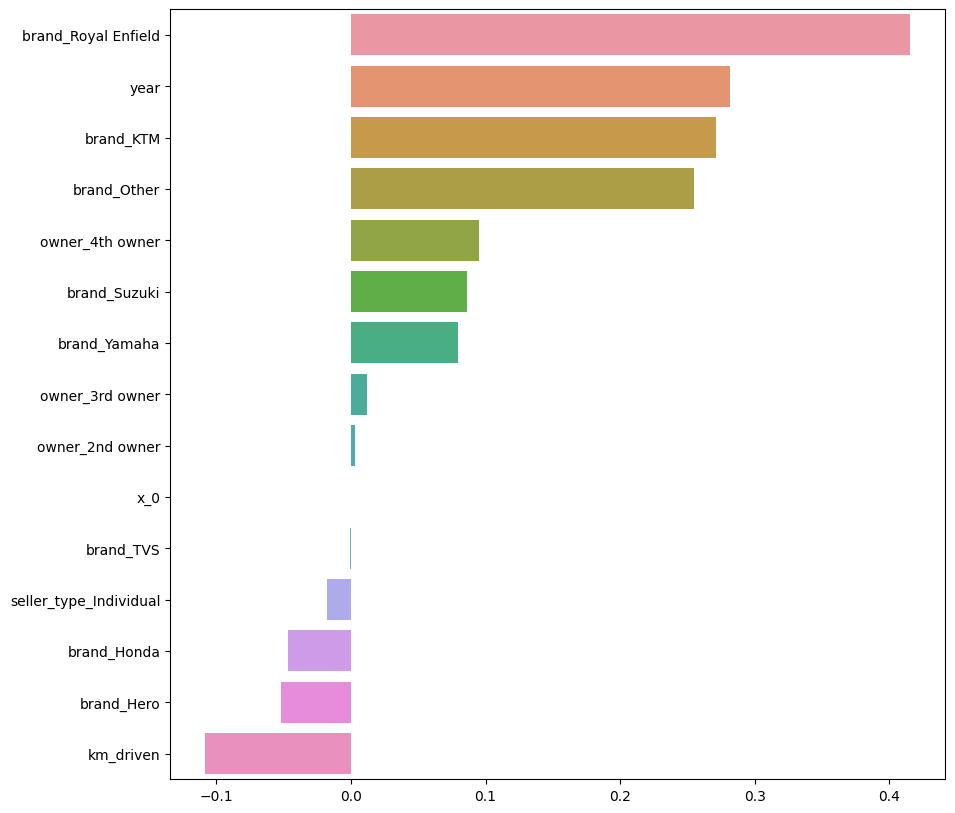

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train[numeric_features].std()), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

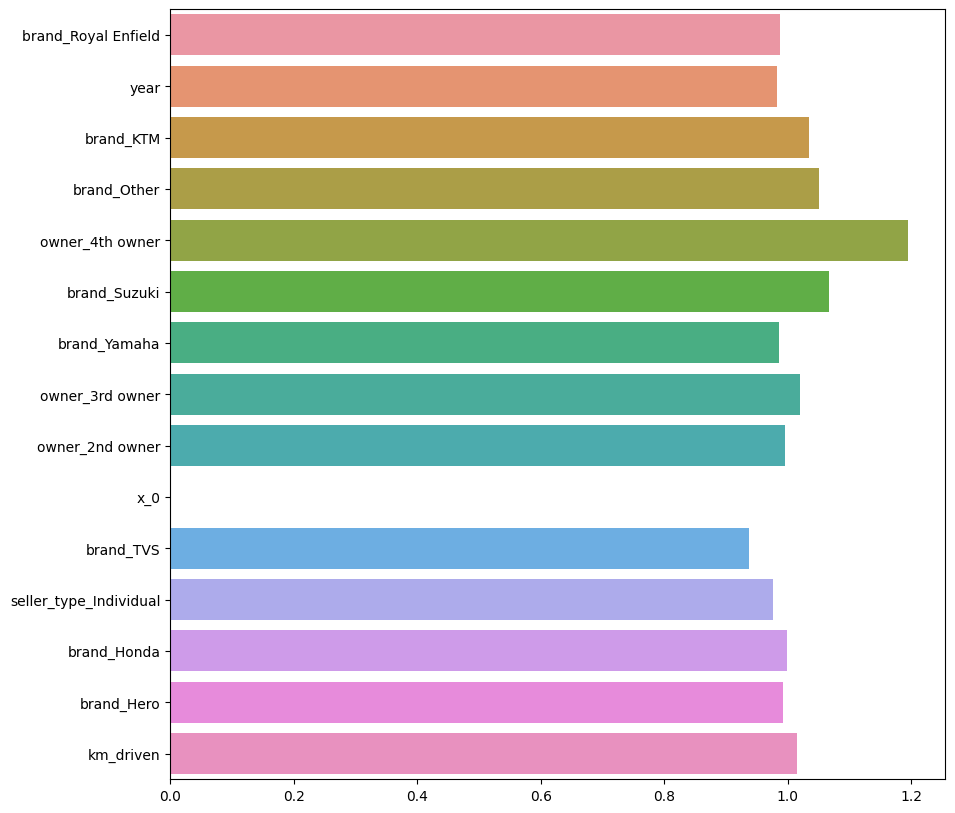

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))

Test RMSE = 0.5692
Train RMSE = 0.7835
Train R2 = 0.4446
Test R2 = 0.5686


In [34]:
model.coef_

array([ 0.27645303, -0.10973856,  0.00331835,  0.01247624,  0.11337087,
       -0.05172481, -0.04653913,  0.28071615,  0.26754048,  0.40973478,
        0.09182487, -0.00044969,  0.07799684, -0.01725459,  0.        ])

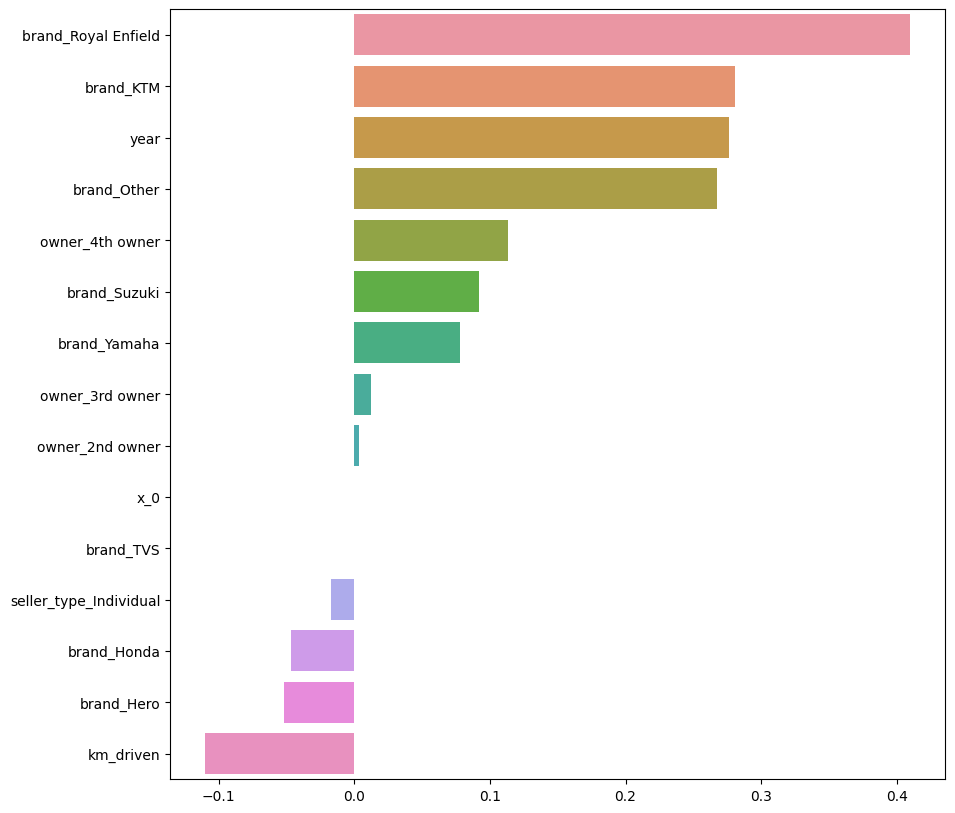

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

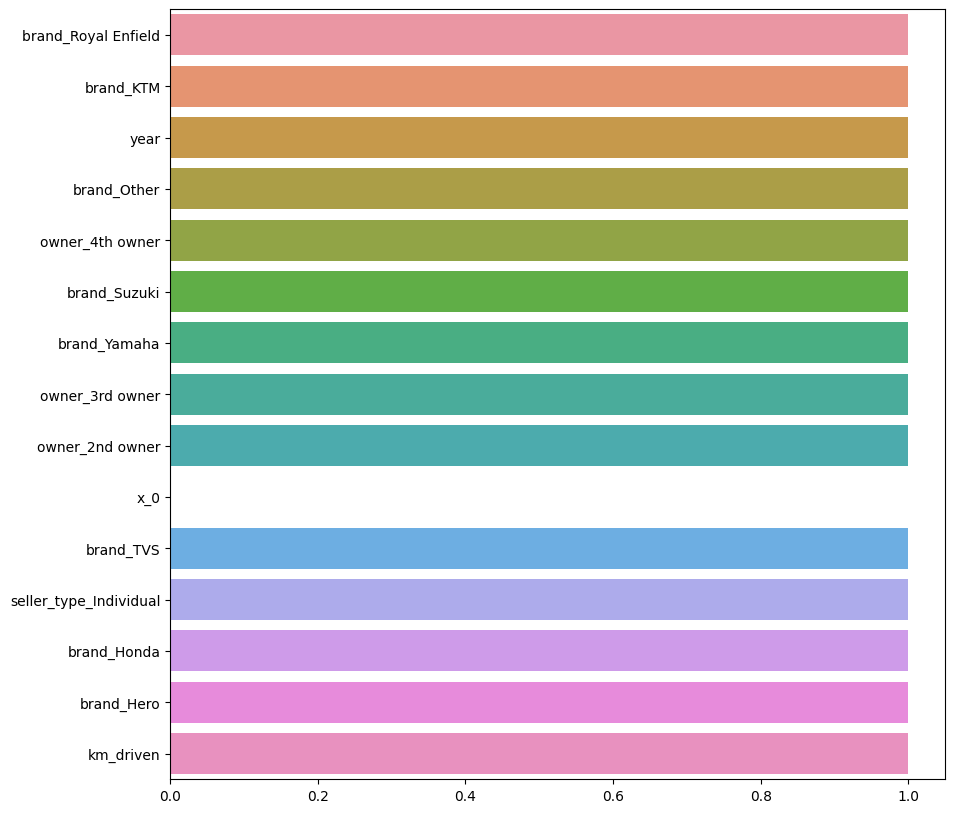

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [37]:
from sklearn.metrics import r2_score
import math

print('RMSE for training:   ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2 for training:    ', r2_score(y_test, y_test_pred))
print('MSE for training:    ', mean_squared_error(y_test, y_test_pred))

RMSE for training:    0.5691898865653926
R^2 for training:     0.5686334370745241
MSE for training:     0.3239771269683245


In [38]:
d = {
    'metrics\ folds': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'Fold1':['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'Fold2': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'E': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'STD': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
}
df1 = pd.DataFrame(data=d)
df1

,metrics\ folds,Fold1,Fold2,E,STD
0,mse-train,mse-train,mse-train,mse-train,mse-train
1,mse-test,mse-test,mse-test,mse-test,mse-test
2,rmse-train,rmse-train,rmse-train,rmse-train,rmse-train
3,rmse-test,rmse-test,rmse-test,rmse-test,rmse-test
4,r2-train,r2-train,r2-train,r2-train,r2-train
5,r2-test,r2-test,r2-test,r2-test,r2-test


Запрограммируем градиентный спуск

In [39]:
df.head()

,selling_price,year,km_driven,owner_2nd owner,owner_3rd owner,owner_4th owner,brand_Hero,brand_Honda,brand_KTM,brand_Other,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,seller_type_Individual
0,175000,2019,350,0,0,0,0,0,0,0,1,0,0,0,1
1,45000,2017,5650,0,0,0,0,1,0,0,0,0,0,0,1
2,150000,2018,12000,0,0,0,0,0,0,0,1,0,0,0,1
3,65000,2015,23000,0,0,0,0,0,0,0,0,0,0,1,1
4,20000,2011,21000,1,0,0,0,0,0,0,0,0,0,1,1


In [40]:
df.head()

,selling_price,year,km_driven,owner_2nd owner,owner_3rd owner,owner_4th owner,brand_Hero,brand_Honda,brand_KTM,brand_Other,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,seller_type_Individual
0,175000,2019,350,0,0,0,0,0,0,0,1,0,0,0,1
1,45000,2017,5650,0,0,0,0,1,0,0,0,0,0,0,1
2,150000,2018,12000,0,0,0,0,0,0,0,1,0,0,0,1
3,65000,2015,23000,0,0,0,0,0,0,0,0,0,0,1,1
4,20000,2011,21000,1,0,0,0,0,0,0,0,0,0,1,1


In [41]:
def ols_cost(X, y, theta):
    #print("X size =", X.shape, "theta size = ", theta.shape)
    inner = np.power(((X * theta.T) - y), 2)
    #inner = np.power(((np.dot(X,theta)) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    lam = 46.4159
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * (np.sum(term) + lam * theta[0,j]))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

In [42]:
data_z = (df - df.mean()) / df.std()
data_z.describe()

,selling_price,year,km_driven,owner_2nd owner,owner_3rd owner,owner_4th owner,brand_Hero,brand_Honda,brand_KTM,brand_Other,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,seller_type_Individual
count,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03,1.061000e+03
mean,7.366607e-17,-1.240938e-14,-2.678766e-17,-3.934438e-17,-7.952587e-17,-3.348458e-18,1.004537e-17,-6.027224e-17,3.683304e-17,-3.013612e-17,2.678766e-17,3.683304e-17,5.022687e-17,3.181035e-17,2.276951e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.704083e-01,-6.013940e+00,-6.588097e-01,-3.619482e-01,-1.023050e-01,-5.322468e-02,-5.287641e-01,-4.876631e-01,-1.520588e-01,-1.734033e-01,-3.382128e-01,-1.705008e-01,-2.636113e-01,-3.259763e-01,-1.325397e+01
25%,-5.619137e-01,-6.665843e-01,-4.040790e-01,-3.619482e-01,-1.023050e-01,-5.322468e-02,-5.287641e-01,-4.876631e-01,-1.520588e-01,-1.734033e-01,-3.382128e-01,-1.705008e-01,-2.636113e-01,-3.259763e-01,7.537800e-02
50%,-2.599829e-01,2.633906e-01,-1.813108e-01,-3.619482e-01,-1.023050e-01,-5.322468e-02,-5.287641e-01,-4.876631e-01,-1.520588e-01,-1.734033e-01,-3.382128e-01,-1.705008e-01,-2.636113e-01,-3.259763e-01,7.537800e-02
75%,1.840330e-01,7.283781e-01,1.673700e-01,-3.619482e-01,-1.023050e-01,-5.322468e-02,-5.287641e-01,-4.876631e-01,-1.520588e-01,-1.734033e-01,-3.382128e-01,-1.705008e-01,-2.636113e-01,-3.259763e-01,7.537800e-02
max,1.243887e+01,1.425859e+00,1.638103e+01,2.760223e+00,9.765479e+00,1.877057e+01,1.889420e+00,2.048663e+00,6.570206e+00,5.761466e+00,2.953932e+00,5.859546e+00,3.789889e+00,3.064816e+00,7.537800e-02


In [43]:
sigma = df.std()
mu = df.mean()
print("Standard Deviations\n", sigma)
print("\nAverages\n", mu)

Standard Deviations
 selling_price             56304.291973
year                          4.301191
km_driven                 51623.152702
owner_2nd owner               0.320290
owner_3rd owner               0.101340
owner_4th owner               0.053124
brand_Hero                    0.413533
brand_Honda                   0.394271
brand_KTM                     0.148759
brand_Other                   0.168496
brand_Royal Enfield           0.303753
brand_Suzuki                  0.165836
brand_TVS                     0.246700
brand_Yamaha                  0.294916
seller_type_Individual        0.075022
dtype: float64

Averages
 selling_price             59638.151744
year                       2013.867107
km_driven                 34359.833176
owner_2nd owner               0.115928
owner_3rd owner               0.010368
owner_4th owner               0.002828
brand_Hero                    0.218662
brand_Honda                   0.192271
brand_KTM                     0.022620
brand_Other      

Best alpha = 46.4159


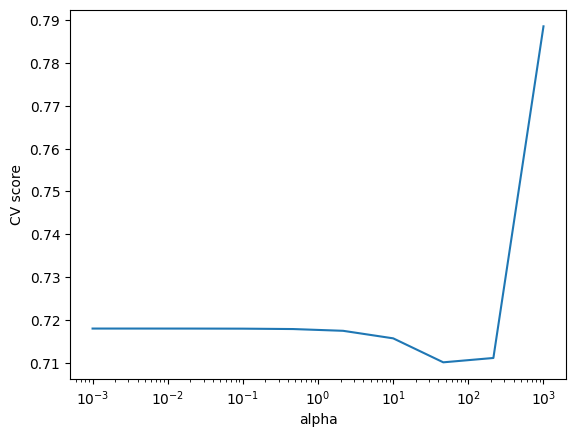

In [44]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

In [45]:
alpha = 0.1
iters = 20000
#theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
#np.matrix(X_train_scaled)
theta_final, cost = gradientDescent(np.asmatrix(X_train_scaled), np.matrix(y_train.values).T, theta, alpha, iters)

In [46]:
y_pred = np.asmatrix(X_test_scaled) * theta_final.T
r2_score(y_test, y_pred)

0.5701